# BUSINESS PROBLEM

A social media platform recently introduced a new bidding type (average bidding), as an alternative to its existing bidding type (maximum bidding). One of the clients of this platform decided to test this new future and compare it with the existing one.

The client randomly splitted its audiences into two equally sized groups as test and control groups. The groups were observed for one month. The data consist of the observation results of the two groups. In this study I will analyze the data by using A/B Test method since my client wanted me to compare the selected groups.

#### Hypotheses for A/B Test

HO: There is no statistically significance difference between average bidding and maximum bidding in terms of number of purchase.

H1: There is a statistically significance difference between average bidding and maximum bidding in terms of number of purchase


In [1]:
# Importing necessary libraries for the first section
import pandas as pd
import numpy as np

In [2]:
# Reading data from excel and reading sheets (groups' observations) separately
def read_data() :
    xls = pd.ExcelFile('Data_Science_Case_Study.xlsx')
    #maximum bidding(existing)  Control Campaign
    df_A = pd.read_excel(xls, 'Control Group')
    #Average Bidding(New)  Test Campaign
    df_B = pd.read_excel(xls, 'Test Group')
    return df_A, df_B


In [3]:
df_A, df_B = read_data()


In [4]:
df_A

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0
5,Control Campaign,2017.01.06,2306.081623,118268.0,83562.0,6596.0,2955.0,1815.0,1455.0,734.0
6,Control Campaign,2017.01.07,2356.996404,144806.0,105315.0,8139.0,3262.0,2559.0,1502.0,799.0
7,Control Campaign,2017.01.08,2670.222971,97719.0,74746.0,5508.0,2282.0,1840.0,837.0,605.0
8,Control Campaign,2017.01.09,2720.901584,113781.0,97334.0,5901.0,2109.0,1955.0,1959.0,562.0
9,Control Campaign,2017.01.10,2441.534142,125097.0,90192.0,7646.0,2914.0,2200.0,1433.0,717.0


In [5]:
df_B

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2017.01.01,2335.586267,160244,121551,8223,2989,2949,1371,913
1,Test Campaign,2017.01.02,2899.490621,100793,68241,4972,2162,1388,1253,510
2,Test Campaign,2017.01.03,3031.740149,89525,83450,3514,1365,1251,995,391
3,Test Campaign,2017.01.04,2794.847648,110122,89985,4411,1533,1134,951,434
4,Test Campaign,2017.01.05,2201.845423,122204,84000,5165,1582,1007,810,492
5,Test Campaign,2017.01.06,2637.733119,138785,108380,6690,2452,2031,567,692
6,Test Campaign,2017.01.07,2461.328112,130497,101308,5894,2181,2318,1206,613
7,Test Campaign,2017.01.08,2033.609057,123025,85887,5381,1432,1329,754,555
8,Test Campaign,2017.01.09,2539.085984,90101,71291,4191,1575,1304,965,418
9,Test Campaign,2017.01.10,2811.404842,125744,106751,5644,2417,867,1094,540


In [6]:
#Empty rows in df_A are deleted
df_A.drop(df_A.index[[30,31]], inplace = True)

In [7]:
df_A

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0
5,Control Campaign,2017.01.06,2306.081623,118268.0,83562.0,6596.0,2955.0,1815.0,1455.0,734.0
6,Control Campaign,2017.01.07,2356.996404,144806.0,105315.0,8139.0,3262.0,2559.0,1502.0,799.0
7,Control Campaign,2017.01.08,2670.222971,97719.0,74746.0,5508.0,2282.0,1840.0,837.0,605.0
8,Control Campaign,2017.01.09,2720.901584,113781.0,97334.0,5901.0,2109.0,1955.0,1959.0,562.0
9,Control Campaign,2017.01.10,2441.534142,125097.0,90192.0,7646.0,2914.0,2200.0,1433.0,717.0


In [8]:
print(df_A.info())
print(df_B.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     float64
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null

In [9]:
# Checking for the missing values of df_A
df_A.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [10]:
# Checking for the missing values of df_B
df_B.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [11]:
# Descriptive analysis for the continuous variables of df_A
df_A.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend [USD],30.0,2481.788026,270.352050,1723.719827,2321.526469,2499.630727,2648.65398,3105.836356
# of Impressions,29.0,114608.827586,18122.017690,68766.000000,100769.000000,118268.000000,125097.00000,146702.000000
Reach,29.0,87628.482759,15958.827440,49422.000000,75440.000000,86442.000000,97334.00000,121762.000000
# of Website Clicks,29.0,5150.896552,1432.388798,2244.000000,4247.000000,4975.000000,6387.00000,8139.000000
# of Searches,29.0,2016.758621,621.055303,931.000000,1657.000000,1969.000000,2282.00000,3262.000000
# of View Content,29.0,1546.310345,466.065990,500.000000,1220.000000,1541.000000,1898.00000,2559.000000
# of Add to Cart,29.0,1061.862069,429.345326,303.000000,715.000000,1013.000000,1455.00000,1959.000000
# of Purchase,29.0,507.379310,146.115027,217.000000,400.000000,484.000000,605.00000,799.000000


In [12]:
# Descriptive analysis for the continuous variables of df_B
df_B.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend [USD],30.0,2571.426085,298.015635,1974.357447,2344.072941,2641.858788,2807.265544,3091.272267
# of Impressions,30.0,110497.300000,21330.440083,73246.000000,99564.250000,108999.000000,122314.250000,160244.000000
Reach,30.0,88826.833333,21373.019568,53002.000000,71442.000000,86525.500000,104221.000000,137273.000000
# of Website Clicks,30.0,4863.866667,1178.616276,3086.000000,3991.250000,4910.000000,5471.000000,8223.000000
# of Searches,30.0,1862.433333,482.162706,1157.000000,1540.500000,1822.000000,2176.250000,2989.000000
# of View Content,30.0,1457.600000,484.110959,817.000000,1145.500000,1321.500000,1720.000000,2949.000000
# of Add to Cart,30.0,885.333333,270.609317,226.000000,687.500000,880.500000,1062.250000,1371.000000
# of Purchase,30.0,486.066667,125.648643,277.000000,410.000000,472.000000,549.000000,913.000000


#!pip install researchpy 
#researchpy library will be used to descriptive analysis of  the data. rp.summary_cont function will be used for continuous variables
#rp.summary_cat is used for categorical variables

In [13]:
!pip install researchpy
import researchpy as rp

In [14]:
rp.summary_cont(df_A[['# of Purchase']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,# of Purchase,29.0,507.3793,146.115,27.1329,451.8001,562.9585


In [15]:
rp.summary_cont(df_B[['# of Purchase']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,# of Purchase,30.0,486.0667,125.6486,22.9402,439.1487,532.9846


#df.apply(lambda x: x.fillna(x.mean()),axis=0)
#this function will be used to fill out  all missing values of the variables with their own mean values.

Variables having missing values in df_A
    # of Impressions       1, Reach                  1
    # of Website Clicks    1, # of Searches          1
    # of View Content      1, # of Add to Cart       1
    # of Purchase          1

In [16]:
rp.summary_cont(df_A[['# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,# of Impressions,29.0,114608.8276,18122.0177,3365.1742,107715.5807,121502.0745
1,Reach,29.0,87628.4828,15958.8274,2963.4799,81558.0695,93698.8961
2,# of Website Clicks,29.0,5150.8966,1432.3888,265.9879,4606.0450,5695.7481
3,# of Searches,29.0,2016.7586,621.0553,115.3271,1780.5218,2252.9954
4,# of View Content,29.0,1546.3103,466.0660,86.5463,1369.0283,1723.5924
5,# of Add to Cart,29.0,1061.8621,429.3453,79.7274,898.5478,1225.1763
6,# of Purchase,29.0,507.3793,146.1150,27.1329,451.8001,562.9585


In [17]:
df_A_cont_filled_mean = df_A[['# of Impressions', 'Reach', '# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']].apply(lambda x: x.fillna(x.mean()),axis=0)

In [18]:
df_A_cont_filled_mean

,# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,90572.000000,75440.000000,4150.000000,1657.000000,1541.000000,566.000000,383.00000
1,129612.000000,95667.000000,6387.000000,2265.000000,1563.000000,1577.000000,644.00000
2,132803.000000,121762.000000,6887.000000,3100.000000,2048.000000,1381.000000,639.00000
3,120570.000000,104011.000000,6478.000000,2579.000000,2083.000000,1650.000000,649.00000
4,95822.000000,69059.000000,4532.000000,1823.000000,1220.000000,940.000000,455.00000
5,118268.000000,83562.000000,6596.000000,2955.000000,1815.000000,1455.000000,734.00000
6,144806.000000,105315.000000,8139.000000,3262.000000,2559.000000,1502.000000,799.00000
7,97719.000000,74746.000000,5508.000000,2282.000000,1840.000000,837.000000,605.00000
8,113781.000000,97334.000000,5901.000000,2109.000000,1955.000000,1959.000000,562.00000
9,125097.000000,90192.000000,7646.000000,2914.000000,2200.000000,1433.000000,717.00000


In [19]:
df_A_Spend = df_A[['Spend [USD]']]


In [20]:
df_A_Spend

,Spend [USD]
0,2436.124529
1,2621.043006
2,2427.021083
3,2565.414978
4,2648.683326
5,2306.081623
6,2356.996404
7,2670.222971
8,2720.901584
9,2441.534142


In [21]:
df_A_catg = df_A[['Campaign Name', 'Date']]

In [22]:
df_A_catg

,Campaign Name,Date
0,Control Campaign,2017.01.01
1,Control Campaign,2017.01.02
2,Control Campaign,2017.01.03
3,Control Campaign,2017.01.04
4,Control Campaign,2017.01.05
5,Control Campaign,2017.01.06
6,Control Campaign,2017.01.07
7,Control Campaign,2017.01.08
8,Control Campaign,2017.01.09
9,Control Campaign,2017.01.10


In [23]:
df_A_new =  pd.concat([df_A_catg, df_A_Spend, df_A_cont_filled_mean], axis = 1)

In [24]:
df_A_new

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2017.01.01,2436.124529,90572.000000,75440.000000,4150.000000,1657.000000,1541.000000,566.000000,383.00000
1,Control Campaign,2017.01.02,2621.043006,129612.000000,95667.000000,6387.000000,2265.000000,1563.000000,1577.000000,644.00000
2,Control Campaign,2017.01.03,2427.021083,132803.000000,121762.000000,6887.000000,3100.000000,2048.000000,1381.000000,639.00000
3,Control Campaign,2017.01.04,2565.414978,120570.000000,104011.000000,6478.000000,2579.000000,2083.000000,1650.000000,649.00000
4,Control Campaign,2017.01.05,2648.683326,95822.000000,69059.000000,4532.000000,1823.000000,1220.000000,940.000000,455.00000
5,Control Campaign,2017.01.06,2306.081623,118268.000000,83562.000000,6596.000000,2955.000000,1815.000000,1455.000000,734.00000
6,Control Campaign,2017.01.07,2356.996404,144806.000000,105315.000000,8139.000000,3262.000000,2559.000000,1502.000000,799.00000
7,Control Campaign,2017.01.08,2670.222971,97719.000000,74746.000000,5508.000000,2282.000000,1840.000000,837.000000,605.00000
8,Control Campaign,2017.01.09,2720.901584,113781.000000,97334.000000,5901.000000,2109.000000,1955.000000,1959.000000,562.00000
9,Control Campaign,2017.01.10,2441.534142,125097.000000,90192.000000,7646.000000,2914.000000,2200.000000,1433.000000,717.00000


In [25]:
print(df_A_new.shape)
print(df_B.shape)

(30, 10)
(30, 10)


In [26]:
print(df_A_new.info)
print(df_B.info)

<bound method DataFrame.info of        Campaign Name        Date  Spend [USD]  # of Impressions  \
0   Control Campaign  2017.01.01  2436.124529      90572.000000   
1   Control Campaign  2017.01.02  2621.043006     129612.000000   
2   Control Campaign  2017.01.03  2427.021083     132803.000000   
3   Control Campaign  2017.01.04  2565.414978     120570.000000   
4   Control Campaign  2017.01.05  2648.683326      95822.000000   
5   Control Campaign  2017.01.06  2306.081623     118268.000000   
6   Control Campaign  2017.01.07  2356.996404     144806.000000   
7   Control Campaign  2017.01.08  2670.222971      97719.000000   
8   Control Campaign  2017.01.09  2720.901584     113781.000000   
9   Control Campaign  2017.01.10  2441.534142     125097.000000   
10  Control Campaign  2017.01.11  2757.649696     134810.000000   
11  Control Campaign  2017.01.12  2648.565944     114608.827586   
12  Control Campaign  2017.01.13  3105.836356      96185.000000   
13  Control Campaign  2017.01.

In [27]:
df_A_nop = df_A_new[['# of Purchase']]

In [28]:
df_A_nop

,# of Purchase
0,383.00000
1,644.00000
2,639.00000
3,649.00000
4,455.00000
5,734.00000
6,799.00000
7,605.00000
8,562.00000
9,717.00000


In [29]:
df_B_nop = df_B[['# of Purchase']]

In [30]:
df_B_nop

,# of Purchase
0,913
1,510
2,391
3,434
4,492
5,692
6,613
7,555
8,418
9,540


In [31]:
AB = pd.concat([df_A_nop, df_B_nop])

In [32]:
AB

,# of Purchase
0,383.00000
1,644.00000
2,639.00000
3,649.00000
4,455.00000
5,734.00000
6,799.00000
7,605.00000
8,562.00000
9,717.00000


In [33]:
A_B = pd.concat([df_A_nop, df_B_nop], axis = 1)
A_B.colums = ['df_A_nop', 'df_B_nop']
A_B

<ipython-input-33-fb67d215ef02>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  A_B.colums = ['df_A_nop', 'df_B_nop']


,# of Purchase,# of Purchase
0,383.00000,913
1,644.00000,510
2,639.00000,391
3,649.00000,434
4,455.00000,492
5,734.00000,692
6,799.00000,613
7,605.00000,555
8,562.00000,418
9,717.00000,540


df_A_nop = pd.DataFrame(), df_B_nop], axis = 1)
A_B.colums = ['df_A_nop', 'df_B_nop']
A_B = pd.DataFrame([''])

A_B = pd.concat([df_A_nop, df_B_nop], axis = 1)
A_B.colums = ['df_A_nop', 'df_B_nop']
A_B = pd.DataFrame([''])

In [34]:
#Converting the variable (nop of A) into data frame to analyze it
df_A_nop = pd.DataFrame(df_A_new['# of Purchase'])

In [35]:
df_A_nop

,# of Purchase
0,383.00000
1,644.00000
2,639.00000
3,649.00000
4,455.00000
5,734.00000
6,799.00000
7,605.00000
8,562.00000
9,717.00000


In [36]:
df_A_nop


,# of Purchase
0,383.00000
1,644.00000
2,639.00000
3,649.00000
4,455.00000
5,734.00000
6,799.00000
7,605.00000
8,562.00000
9,717.00000


In [37]:
#Converting the variable (nop of B) into data frame to analyze it
df_B_nop = pd.DataFrame(df_B['# of Purchase'])

In [38]:
df_B_nop

,# of Purchase
0,913
1,510
2,391
3,434
4,492
5,692
6,613
7,555
8,418
9,540


In [39]:
A_B = pd.concat([df_A_nop, df_B_nop], axis = 1)
A_B.columns = ["df_A_nop","df_B_nop"]

A_B.head()

,df_A_nop,df_B_nop
0,383.0,913
1,644.0,510
2,639.0,391
3,649.0,434
4,455.0,492


In [40]:
A_B


,df_A_nop,df_B_nop
0,383.00000,913
1,644.00000,510
2,639.00000,391
3,649.00000,434
4,455.00000,492
5,734.00000,692
6,799.00000,613
7,605.00000,555
8,562.00000,418
9,717.00000,540


In [41]:
A_B.describe().T

,count,mean,std,min,25%,50%,75%,max
df_A_nop,30.0,507.379310,143.573702,217.0,408.5,495.689655,604.5,799.0
df_B_nop,30.0,486.066667,125.648643,277.0,410.0,472.000000,549.0,913.0


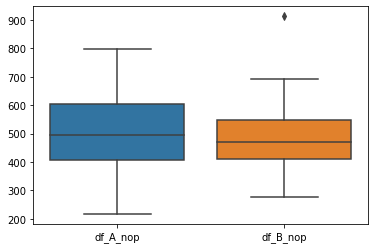

In [42]:
import seaborn as sns
sns.boxplot(data = A_B);

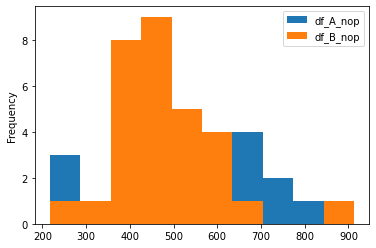

In [43]:
# Histogram is one of the method detecting Normality
A_B.plot.hist();

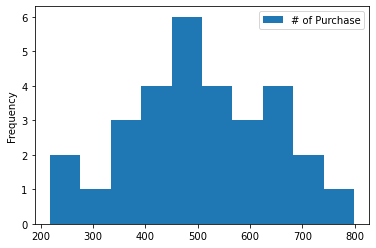

In [44]:
df_A_nop.plot.hist()

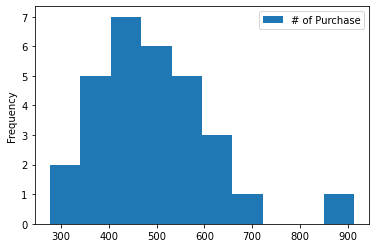

In [45]:
df_B_nop.plot.hist()

### Assumption Control for Independent Two Samples T Test (A/B Test) 

In [46]:
#Shapiro test gives exact result for normalitiy assumption
# importing stats
from scipy import stats

#### Hypotheses for Normality Test

HO: The sample is normally distributed

H1: The sample is not normally distributed

In [47]:
#Normality test by using Shapiro test

from scipy.stats import shapiro

In [48]:
shapiro(A_B.df_A_nop)

ShapiroResult(statistic=0.9882174134254456, pvalue=0.9788618683815002)

##### Since p value (0.97) > alpha (0.05) we can  not reject H0. 
##### This result indicates that normality assumption is  met.

In [49]:
shapiro(A_B.df_B_nop)

ShapiroResult(statistic=0.9188652038574219, pvalue=0.02506561577320099)

- Since p value (0.02) < alpha (0.05) we reject H0. 
- This results indicates that normality assumption is not met.
- Because of this result WE CAN NOT USE INDEPENDENT TWO SAMPLES T TEST.

#### Hypotheses for Homogeneity of Variance Test

HO: The groups have equel variances (or The variance is equal across the groups)

H1: The groups have not equel variances (or The variance is not equal across the groups)

In [50]:
# Testing homogeneity of variance by using Levene test 

stats.levene(A_B.df_A_nop, A_B.df_B_nop)

LeveneResult(statistic=1.4573242947259228, pvalue=0.23225655710383264)

- Since p value (0.23) > alpha (0.05) we can  not reject H0. 
- This results indicates that Homogeneity of variance is  is  met.

###### SINCE NORMALITY ASSUMPTION IS NOT MET, WE NEED TO USE NON PARAMETRIC INDEPENDENT TWO SAMPLES TEST (Mann Whitney U Test) 
###### In other words another type of A/B TEST

In [51]:
stats.mannwhitneyu(A_B.df_A_nop, A_B.df_B_nop)

MannwhitneyuResult(statistic=391.0, pvalue=0.19352350307853528)

- This result indicates that there is no statistically significant difference between the groups because p value (0.19) > alpha value (0.05). Therefore we can not reject H0.

##### Feature Engineering

The following analyeses are wanted us by our customer, as well.

In [52]:
df_A["Website Click Through Rate"] = df_A["# of Website Clicks"] / df_A["# of Impressions"] * 100
df_B["Website Click Through Rate"] = df_B["# of Website Clicks"] / df_B["# of Impressions"] * 100

df_A["Content_Purchase_Ratio"] = df_A["# of View Content"] / df_A["# of Purchase"]
df_B["Content_Purchase_Ratio"] = df_B["# of View Content"] / df_B["# of Purchase"]

df_A["Cost per Action"] = df_A["Spend [USD]"] / df_A["Content_Purchase_Ratio"]
df_B["Cost per Action"] = df_B["Spend [USD]"] / df_B["Content_Purchase_Ratio"]

df_A["Conversion Rate"] = df_A["Content_Purchase_Ratio"] / df_A["# of Website Clicks"] * 100
df_B["Conversion Rate"] = df_B["Content_Purchase_Ratio"] / df_B["# of Website Clicks"] * 100

In [53]:
df_A_final = df_A[["Website Click Through Rate", "Content_Purchase_Ratio", "Cost per Action", "Conversion Rate"]]
df_B_final = df_B[["Website Click Through Rate", "Content_Purchase_Ratio", "Cost per Action", "Conversion Rate"]]
group_A = pd.concat([df_A_final, df_A_nop], axis = 1)
group_B = pd.concat([df_B_final, df_B_nop], axis = 1)
group_A["Group"] = "MaximumBidding"
group_B["Group"] = "AverageBidding"
group_AB = pd.concat([group_A,group_B])

In [54]:
group_AB["Group"].value_counts()

MaximumBidding    30
AverageBidding    30
Name: Group, dtype: int64

In [55]:
# importing necessary libraries for visualization  
import seaborn as sns
import matplotlib.pyplot as plt

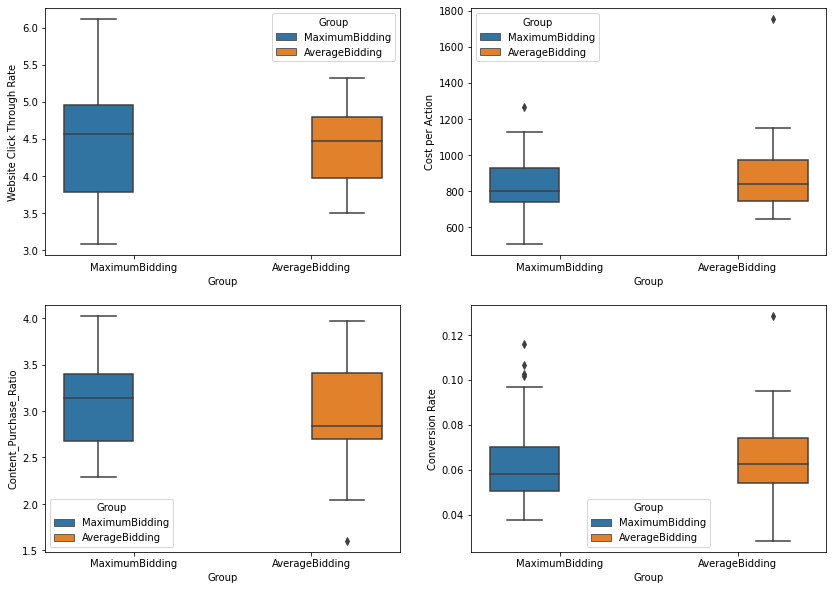

In [56]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(y='Website Click Through Rate', x = 'Group', hue = 'Group', data = group_AB, ax=axarr[0][0])
sns.boxplot(y='Content_Purchase_Ratio', x = 'Group', hue = 'Group', data = group_AB, ax=axarr[1][0])
sns.boxplot(y='Cost per Action', x = 'Group', hue = 'Group', data = group_AB, ax=axarr[0][1])
sns.boxplot(y='Conversion Rate', x = 'Group', hue = 'Group', data = group_AB, ax=axarr[1][1]);


In [57]:
A_B = pd.concat([df_A, df_B], axis = 0)
A_B.reset_index(drop=True, inplace=True) 
A_B.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Website Click Through Rate,Content_Purchase_Ratio,Cost per Action,Conversion Rate
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0,4.581990,4.023499,605.474169,0.096952
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0,4.927784,2.427019,1079.943504,0.037999
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0,5.185877,3.205008,757.259020,0.046537
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0,5.372812,3.209553,799.305963,0.049545
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0,4.729603,2.681319,987.828617,0.059164


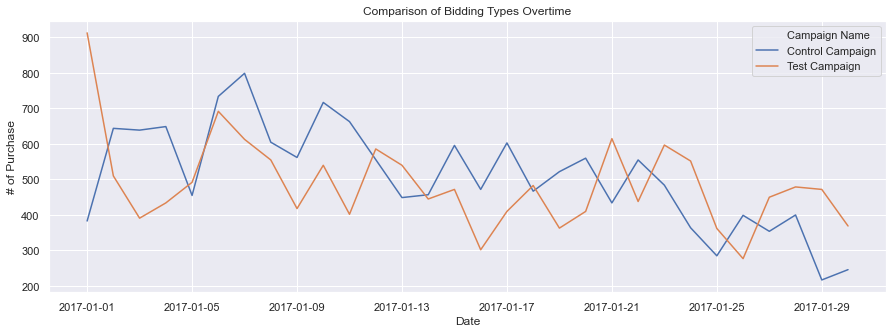

In [58]:
A_B['Date'] = pd.to_datetime(A_B['Date'],infer_datetime_format=True)

sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(data=A_B, x='Date', hue='Campaign Name', y='# of Purchase').set_title('Comparison of Bidding Types Overtime');

### Conclusion

I wanted to use Independent Two Samples T Test as an A/B Test to compare the groups; however, though homogeneity of variance was met, normality assumption was not met for Average Bidding group (group B). Thus, Mann Whitney U Test was conducted as a non parametric Independent  Two Samples Test to compare the groups. That is, I used another A/B Test to compare the groups.

A/B Test (Mann Whitney U Test) result indicated that there was no statistically significant difference between the groups because p value (0.19) > alpha value (0.05). Therefore we could not reject H0.
In other words, since the shapes of distribution of number of purchases for two groups were not similar, we can say that maximum bidding (mean = 507.379) and average bidding (mean = 486.066) in terms of number of purchase are not statistically significantly different. (or we can say that there is no statistically significant difference between maximum bidding and average bidding in terms of number of purchase). That is, new bidding type does not make any statistically significant difference. 

Thereby, we can recommed to our client that the client does not need to use new bidding type.

Limitation of the analysis: "The comparision of bidding types over time" figure indicates that  more bidding tests in the next months are necessary to get more accurate results because the number of purchases start to increase in average bidding type (test campaign) starting from the 20th day of the observation. 
